# <font color="blue"> Business Problem Statement</font>

Identify the most potential leads, also known as ‘Hot Leads’. Meaning assign a lead score to each of the leads. The customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Note : Data shared has both form initial lead data and sales team updated data

# <font color='blue'>Goal</font>

1) Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.<br>

2)There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well



1. Data Loading
2. Checking
        2.1 Size
        2.2 Shape
        2.3 Data Attributes
        2.4 Data type of each Attribute
        2.5 Description and Distribution of Data
        2.6 Identifying Categorical Data
        2.7 Understanding Categorical Data Provided
        2.8 Observations 1
        2.9 Identifying Continuous Data
        2.10 Understanding Continuous Data Provided
        2.11 Observations 2
3. Data Selection and Data Correction
        3.1 Data Correction
        3.2 Data Type Correction
        3.3 Data Section and Data Elimination
4. Missing Values Analysis and Outlier Analysis and Handling
5. Data Analysis and Patterns Identification
        5.1 Target Data Balanced or Imbalanced?
        5.2 Data Isolation Based on Target Variable
        5.3 Univariate Analysis on Categorical Data with respective to Target
        5.4 Bivariate analysis on Categorical-Categorical Data with respective to Target
        5.5 Finding Hidden Correlation among Continuous Data
        5.6 Observations
        5.7 Univariate Analysis on Continuous Data with respective to Target
        5.8 Bivariate Analysis on Continuous - Continuous Data with respective to Target
        5.9 Bivariate Analysis on Categorical and Continuous Data with respective to Target
6. Data Preprocessing
        6.1 Dummies Creation
        6.2 Train Test Split
        6.3 Scaling
7. Feature Selection
        7.1 RFE
        7.2 Manual Feature Selection
8. Model Building (Logistic Regression)
9. Training Score Details
10. Model Evaluation  on test data set
11. Conclusion 



In [1]:
# To Filter Warnings
import warnings
warnings.filterwarnings('ignore')

#Import allrequired libraties here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import  Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, roc_auc_score

#TO Display all columns and rows of a dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## **<font color="sky blue">1. Data Loading</font>** :

In [2]:
# Load Data Here
leads = pd.read_csv('data/leads.csv')
#TO display to 10 leads
leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


## **<font color="sky blue">2.Data checks</font>**

### **<font color="#F08080">2.1 Size & 2.2 Shape</font>**

In [3]:
# Info of the leads dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Number of Leads** : 9240 <br>
**Number of given predictors** : 36 <br>
**NUmber of Target Label** : 1 (converted)

### **<font color="#F08080">2.3 Data Attributes</font>**

In [4]:
leads.columns.to_list()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Description of these attributes provide here: https://docs.google.com/spreadsheets/d/1xv1MJrpg4lpG0_otHcIfP_ZHzQQ6S_DP/edit?usp=sharing&ouid=106417276587365747562&rtpof=true&sd=true

### **<font color="#F08080">2.4 Data type of each Attribute</font>**

In [5]:
# Data Type Checking
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

### **<font color="#F08080">2.5 Description and Distribution of Data</font>**

In [6]:
#  Basic Data description in Statistical terms
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### **<font color="#F08080">2.6 Identifying Categorical Data</font>**

In [7]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
#manually verified add added
categorical_variables = {
    "Lead Origin", "Lead Source", "Do Not Email", "Do Not Call", "Converted","Last Activity", "Country", "Specialization", "How did you hear about X Education",
    "What is your current occupation", "What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article", "X Education Forums",
    "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Tags", "Lead Quality",
    "Update me on Supply Chain Content", "Get updates on DM Content", "Lead Profile", "City", "I agree to pay the amount through cheque",
    "A free copy of Mastering The Interview","Asymmetrique Activity Index", "Asymmetrique Profile Index", "Last Notable Activity"
}

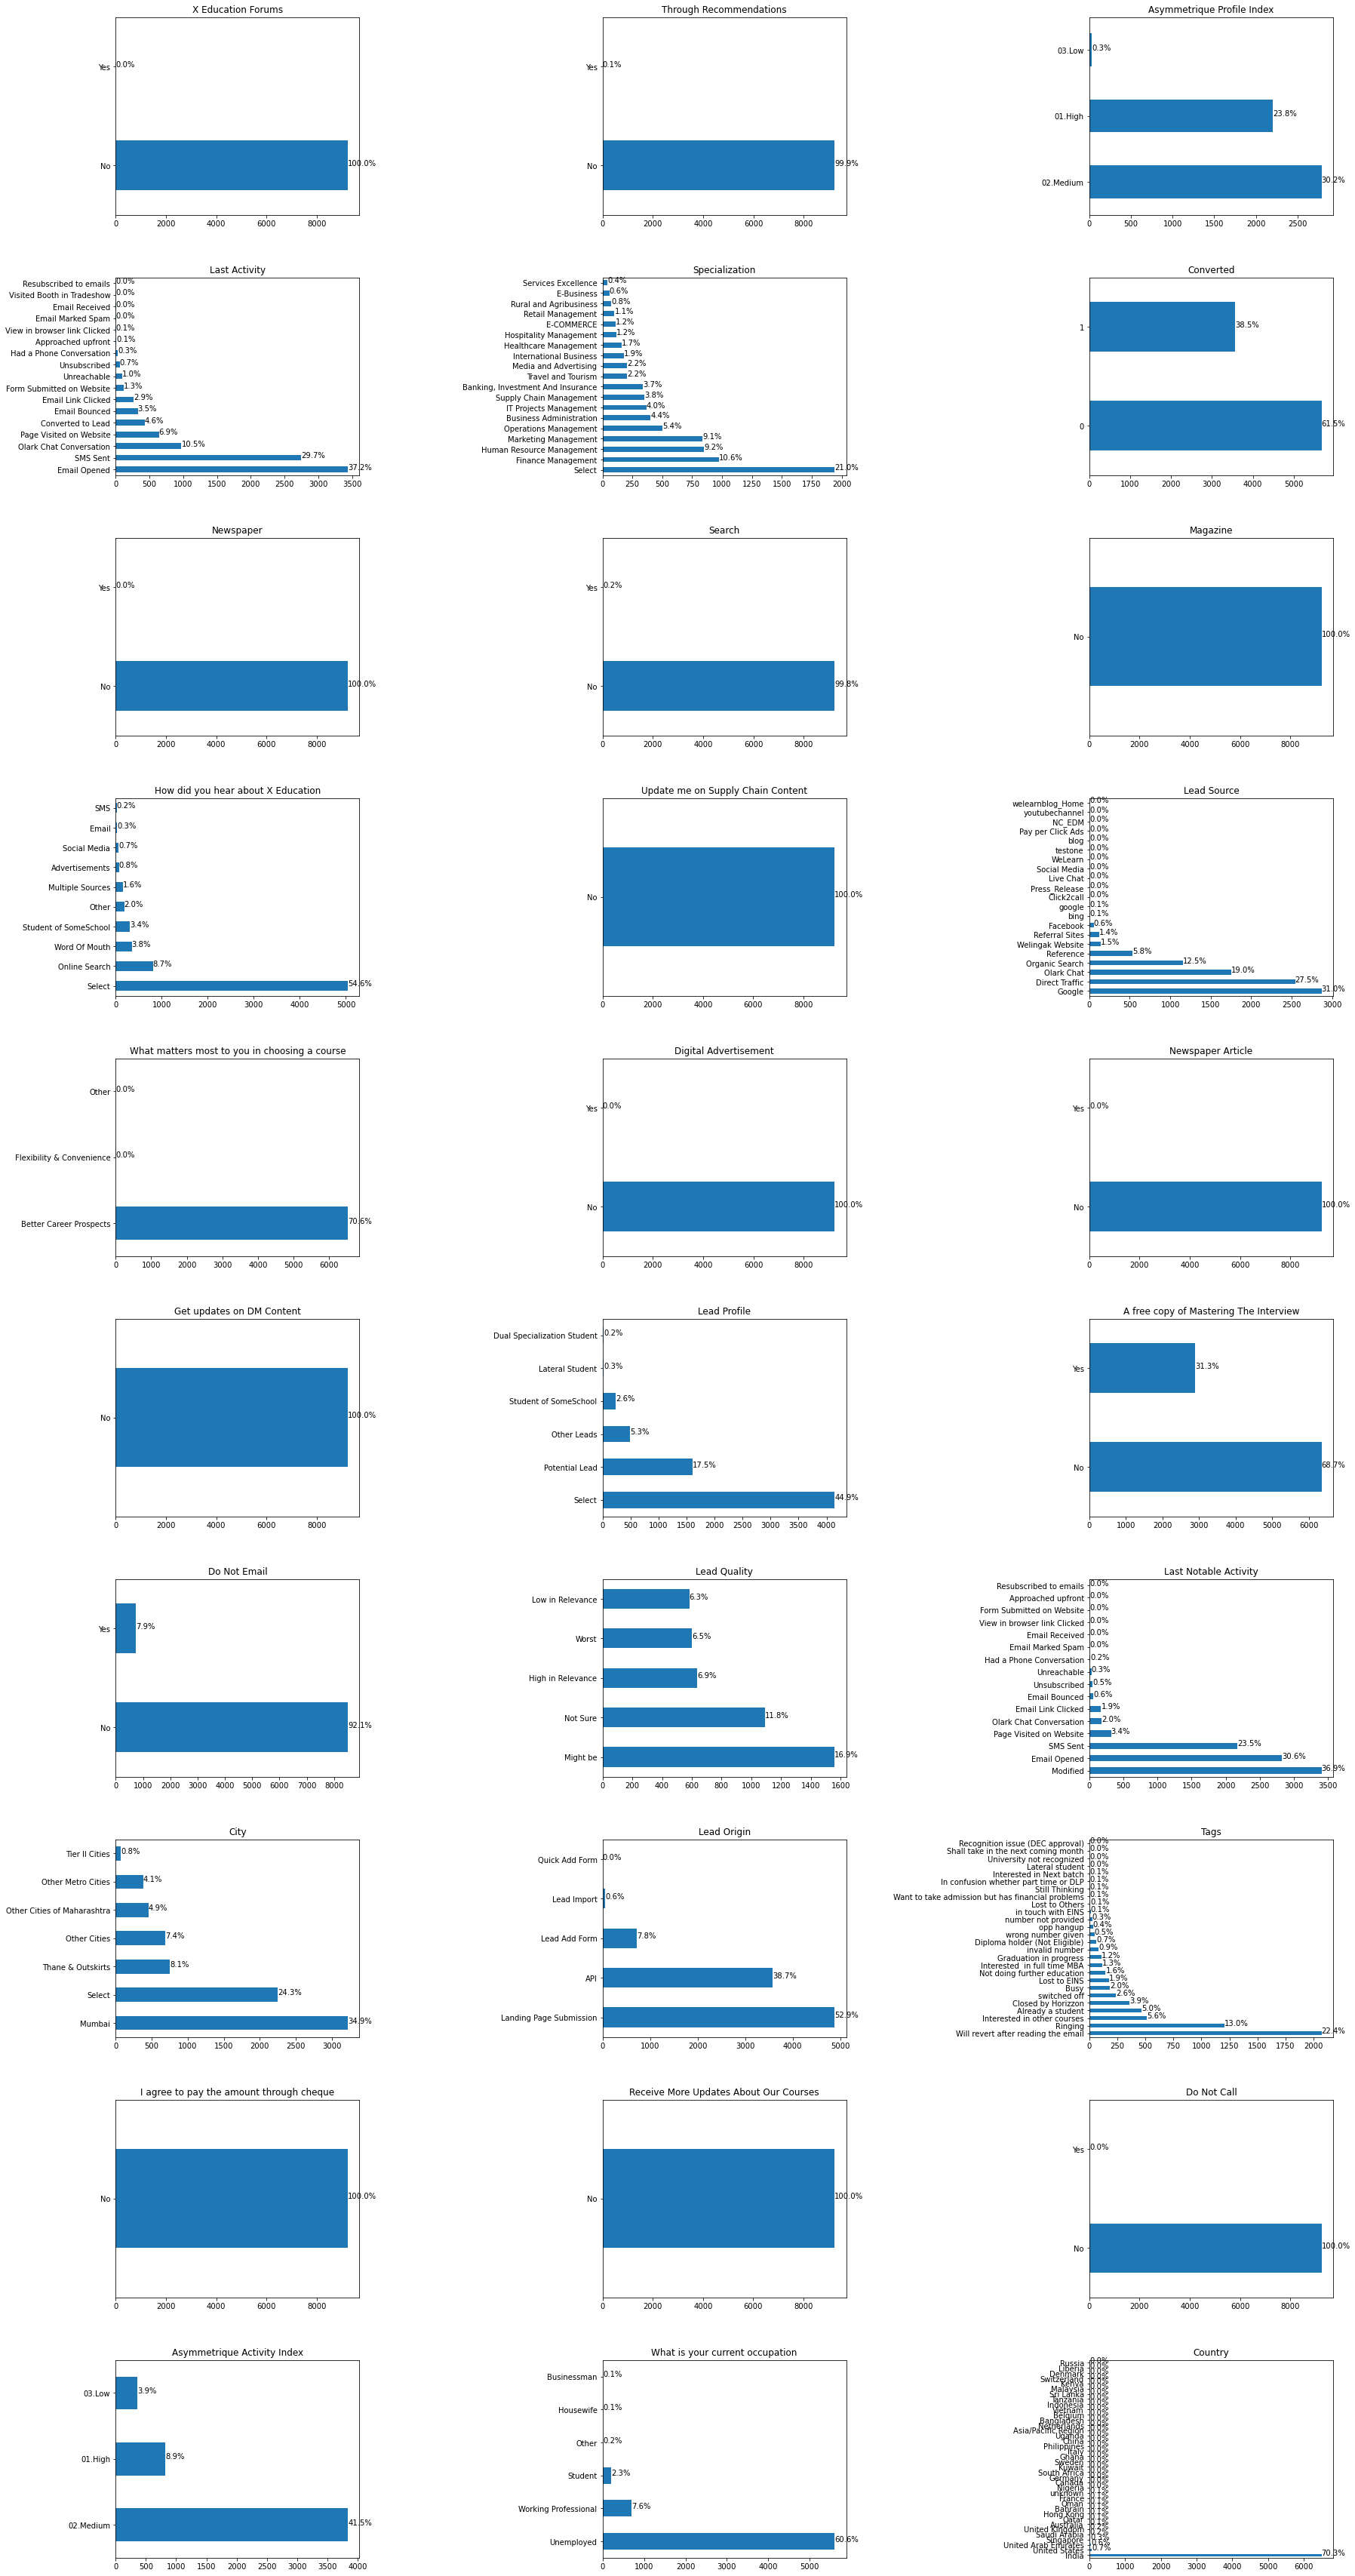

In [9]:
fig = plt.figure(figsize=(25,100))
for index, col in enumerate(categorical_variables):
    ax= fig.add_subplot(21,3, index+1)
    ax.set_title(col)
    leads[col].value_counts().plot(kind ="barh")
    total = len(leads[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

### **<font color="#F08080">2.8 Observations 1</font>**

1. Conversion Rate is  ~38 %
2. ~ 92% learners chosen Do Not Email
3. Lead Quality seems to have lot of  has null values 
4. Many learners from Mumbai and also many not provided by the city. 'Select' has to be imputed with NaN
5. Many people not given information about how they hear about X Education
6. Lead Source gives the impression that many people hear about X Education through Google, Direct Traffic or Organix Search.
7. Profile Score, Index has many None Values
8. Many learners not given Profile Info
9. 100% Chosen Do not Call(May be default option)
10. Specialization many learners not provided the info

Note 1: Data Has few Duplicate columns which represents the same meaning. It is because of data set containing initial lead data and sales team updated leads

Note 2: Data has many null values and duplicate categories and Not available information is represented as 'Select' for few attributes


### **<font color="#F08080">2.9 Identifying Continuous Data</font>**

In [10]:
#To get all numerical columns
numberical_variables = set(leads.columns.to_list()) - set(categorical_variables)
numberical_variables = numberical_variables - {"Prospect ID", "Lead Number"}
print(numberical_variables)

{'Asymmetrique Profile Score', 'Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website', 'Asymmetrique Activity Score'}


In [11]:
leads[numberical_variables].dtypes

Asymmetrique Profile Score     float64
Page Views Per Visit           float64
TotalVisits                    float64
Total Time Spent on Website      int64
Asymmetrique Activity Score    float64
dtype: object

### **<font color="#F08080">2.10 Understanding Continuous Data Provided</font>**

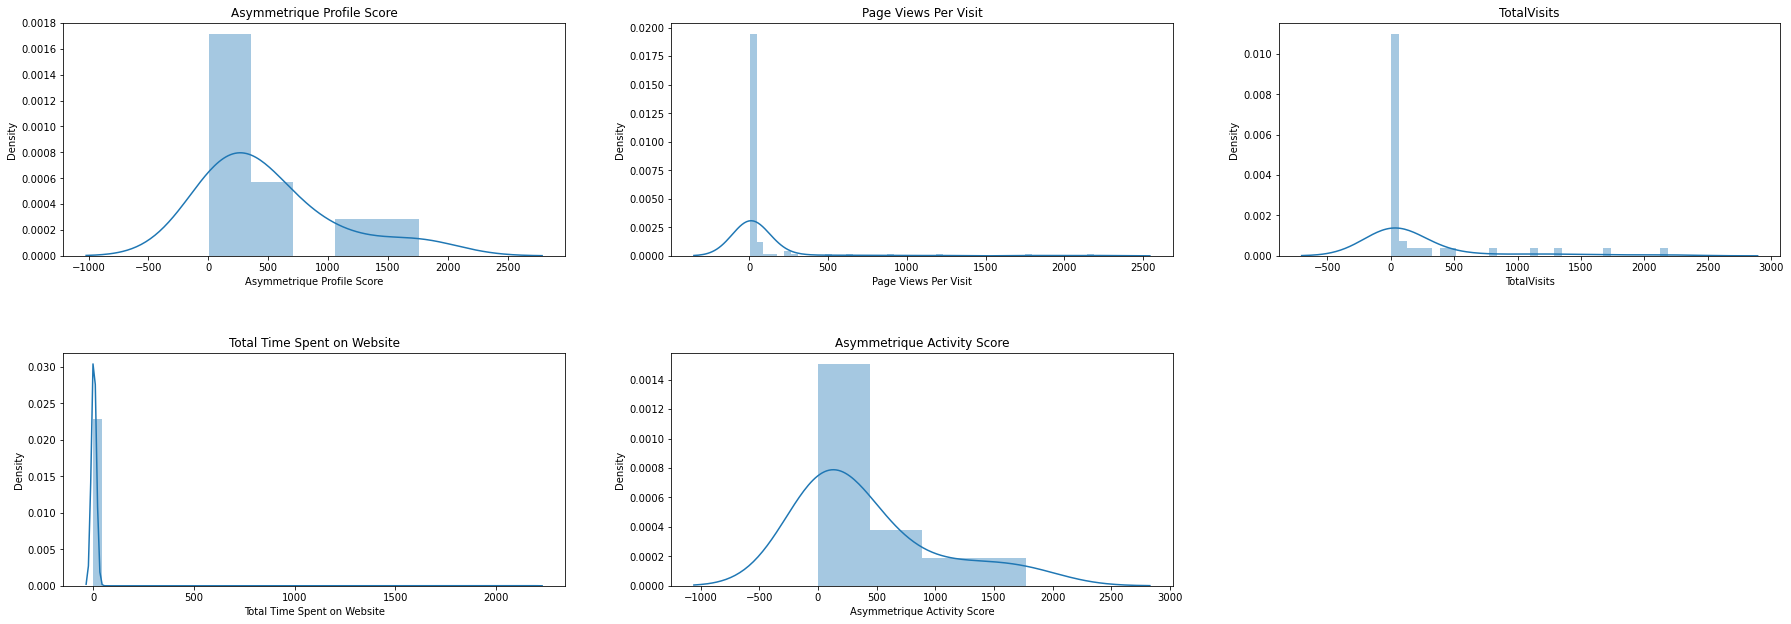

In [12]:
fig = plt.figure(figsize=(25,100))
column = 0
row = 0
for index, col in enumerate(numberical_variables):
    if column > 4:
        column = 0
        row = row+1
    ax= fig.add_subplot(22,3, index+1)
    ax.set_title(col)
    sns.distplot(leads[col].value_counts())

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

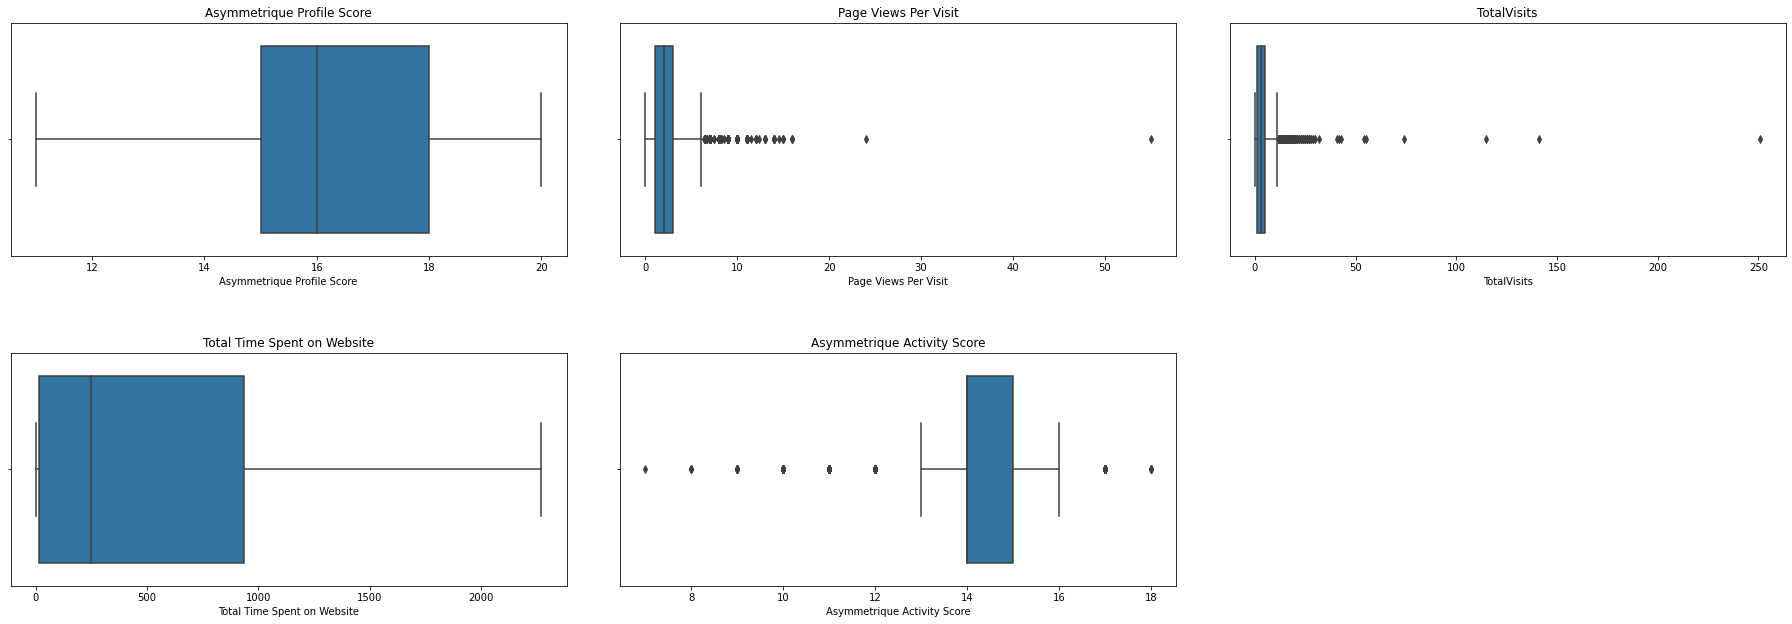

In [13]:
fig = plt.figure(figsize=(25,100))
for index, col in enumerate(numberical_variables):
    if column > 4:
        column = 0
        row = row+1
    ax = fig.add_subplot(22,3, index+1)
    ax.set_title(col)
    sns.boxplot(leads[col])

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

In [14]:
leads = leads[leads["Page Views Per Visit"] < 20] # Outliers in Page Views Per Visit Predictor

In [15]:
leads = leads[leads["TotalVisits"] < 20] # Outliers in TotalVisits 

### **<font color="#F08080">2.11 Observations 2</font>**

1. Less Numerical Data
2. Data is positively  skewed
3. has outliers in TotalVisits, Page Views Per Page, Activity Score
4. Many people spent on website 8 to 30 min

## **<font color="sky blue">3. Data Selection and Data Correction</font>**

### **<font color="#F08080">3.1 Data Correction</font>**

In [16]:
# To replace 'Select'  with NaN values
leads.replace("Select", np.nan, inplace=True)

In [17]:
# To verify any Select values left  or not
leads.loc[: , (leads == 'Select').any()].columns.to_list()

[]

In [18]:
# Lead Source has google, Google. So replacing google with Google
leads["Lead Source"] = leads["Lead Source"].replace('google', 'Google')

### **<font color="#F08080">3.2 Data Type Correction</font>**

In [19]:
#converting data type of identified categorical columns to 'category'
leads[list(categorical_variables)] = leads[list(categorical_variables)].apply(lambda x : x.astype('category') )

In [20]:
# #converting data type of identified continous columns to 'category'
leads[list(numberical_variables)] = leads[list(numberical_variables)].apply(pd.to_numeric)

In [21]:
# To verify data type
leads.dtypes

Prospect ID                                        object
Lead Number                                         int64
Lead Origin                                      category
Lead Source                                      category
Do Not Email                                     category
Do Not Call                                      category
Converted                                        category
TotalVisits                                       float64
Total Time Spent on Website                         int64
Page Views Per Visit                              float64
Last Activity                                    category
Country                                          category
Specialization                                   category
How did you hear about X Education               category
What is your current occupation                  category
What matters most to you in choosing a course    category
Search                                           category
Magazine      

### **<font color="#F08080">3.3 Data Section and Data Elimination<br></font>**

In [22]:
# Removing 100% variance and 0% varaice attributes
columns_not_required = ['Prospect ID','Lead Number','Magazine', 'Through Recommendations', 'Search', 
'I agree to pay the amount through cheque', 
'Digital Advertisement', 'X Education Forums', 'Get updates on DM Content',
 'Receive More Updates About Our Courses', 
'Update me on Supply Chain Content', 'Newspaper Article', 'Newspaper', 'Do Not Call']

In [23]:
columns_not_required

['Prospect ID',
 'Lead Number',
 'Magazine',
 'Through Recommendations',
 'Search',
 'I agree to pay the amount through cheque',
 'Digital Advertisement',
 'X Education Forums',
 'Get updates on DM Content',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Newspaper Article',
 'Newspaper',
 'Do Not Call']

In [24]:
leads_features = list(set(leads.columns) - set(columns_not_required))

In [25]:
leads.drop(columns_not_required, axis=1, inplace=True)

In [26]:
leads.shape

(9044, 23)

## **<font color="sky blue">4. Missing Values Analysis and Outlier Analysis and Handling</font>**

In [27]:
# To find null percentace for each data attribute
null_percentage_by_feature = (leads.isnull().sum()/ len(leads)) * 100

<AxesSubplot:>

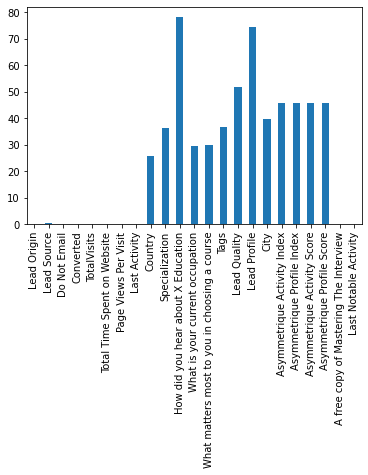

In [28]:
null_percentage_by_feature.plot(kind='bar') 

In [29]:
#Dropping columns with null percentage 40 or above
leads = leads[null_percentage_by_feature[null_percentage_by_feature < 40].index]
#Dropping records with null percentage 70 or above
leads = leads[(leads.isnull().sum(axis=1) / len(leads.columns)) * 100 < 70]
#To find predictors after dropping data
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [30]:
# To impute values with given imputation value

def get_imputation_mapper(INPUTATION_CUTOFF):
    IMPUTATION_MAPPER_1 = {}
    for col in leads.dtypes[leads.dtypes == 'category'].index.to_list():
        if col in INPUTATION_CUTOFF:
            IMPUTATION_MAPPER_1[col] = {}
            for category in leads[col].value_counts().index.to_list():
                temp = leads[col].value_counts() / len(leads[col]) * 100
                if temp[category] <  INPUTATION_CUTOFF.get(col):
                     IMPUTATION_MAPPER_1[col].update({
                         category: "Other"
                     })
                else:
                    IMPUTATION_MAPPER_1[col].update({
                         category: category
                     })
    return IMPUTATION_MAPPER_1
     

INPUTATION_CUTOFF = {
    "Lead Origin": 10,
    "Lead Source": 1,
    "Last Activity":1,
    "Country": 1,
    "Tags":1,
    "Last Notable Activity": 1
    
    
}
IMPUTATION_MAPPER_1 = get_imputation_mapper(INPUTATION_CUTOFF)
    
print(IMPUTATION_MAPPER_1)

{'Lead Origin': {'Landing Page Submission': 'Landing Page Submission', 'API': 'API', 'Lead Add Form': 'Other', 'Lead Import': 'Other'}, 'Lead Source': {'Google': 'Google', 'Direct Traffic': 'Direct Traffic', 'Olark Chat': 'Olark Chat', 'Organic Search': 'Organic Search', 'Reference': 'Reference', 'Welingak Website': 'Welingak Website', 'Referral Sites': 'Referral Sites', 'Facebook': 'Other', 'bing': 'Other', 'Click2call': 'Other', 'Live Chat': 'Other', 'Press_Release': 'Other', 'Social Media': 'Other', 'Pay per Click Ads': 'Other', 'welearnblog_Home': 'Other', 'NC_EDM': 'Other', 'WeLearn': 'Other', 'blog': 'Other', 'testone': 'Other', 'youtubechannel': 'Other'}, 'Last Activity': {'Email Opened': 'Email Opened', 'SMS Sent': 'SMS Sent', 'Olark Chat Conversation': 'Olark Chat Conversation', 'Page Visited on Website': 'Page Visited on Website', 'Converted to Lead': 'Converted to Lead', 'Email Bounced': 'Email Bounced', 'Email Link Clicked': 'Email Link Clicked', 'Form Submitted on Website'

In [31]:
for col in IMPUTATION_MAPPER_1:
    leads[col] = leads[col].map(IMPUTATION_MAPPER_1.get(col))
    leads[col] = leads[col].astype("category")

In [32]:
#To verify categories after imputation
leads[IMPUTATION_MAPPER_1.keys()].nunique()

Lead Origin               3
Lead Source               8
Last Activity             9
Country                   2
Tags                     12
Last Notable Activity     7
dtype: int64

In [33]:
#To verify null values after imputation
percentge_of_missing  = ((leads.isnull().sum()) / leads.shape[0]) * 100 
percentge_of_missing[percentge_of_missing > 0] 

Lead Source                                       0.320655
Country                                          25.696594
Specialization                                   36.432994
What is your current occupation                  29.533392
What matters most to you in choosing a course    29.732419
Tags                                             36.665192
City                                             39.727996
dtype: float64

In [34]:
# Replacing Na with "NA" Not AVailable
FILLNA_MAPPER = {"Lead Source":"NA"}

In [35]:
#Update Mapper
FILLNA_MAPPER.update({"TotalVisits": leads["TotalVisits"].median()})

<AxesSubplot:ylabel='Frequency'>

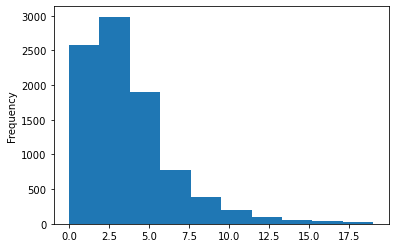

In [36]:
#To check distribbution of TotalVisits
leads["TotalVisits"].plot(kind='hist')

In [37]:
FILLNA_MAPPER.update({"Page Views Per Visit": leads["Page Views Per Visit"].median()})

<AxesSubplot:ylabel='Frequency'>

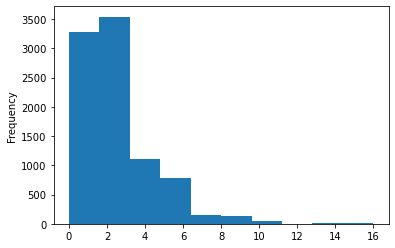

In [38]:
# TO check dist of Page Views Per Visit
leads["Page Views Per Visit"].plot(kind="hist")

In [39]:
FILLNA_MAPPER.update({"Last Activity": "NA", "Country":"NA","Specialization":"NA", "What is your current occupation":"NA",
                      "What matters most to you in choosing a course":"NA", "Tags":"NA", "City":"NA"})

In [40]:
# Imputing NaN with Mapper 
for col in FILLNA_MAPPER.keys():
    if leads[col].dtype.name == "category":
        leads[col] = leads[col].cat.add_categories(FILLNA_MAPPER.get(col))
    leads[col].fillna(FILLNA_MAPPER.get(col), inplace=True)

In [41]:
# Verification
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
City                                             0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

In [42]:
# Number of records and Variables after data corretion
leads.shape

(9044, 16)

## **<font color="sky blue">5. Data Analysis and Patterns Identification</font>**

### **<font color="#F08080">5.1 Target Data Balanced or Imbalanced?</font>**

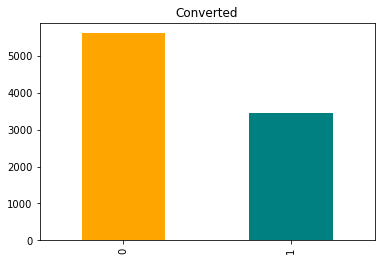

In [43]:
#Is Balanced dataset
leads.Converted.value_counts().plot(kind='bar', color=["orange","teal"])
plt.title("Converted")
plt.show()

**Observation** : Not balanced . Not converted rate is 2x to convetion rate

### **<font color="#F08080">5.2 Data Isolation Based on Target Variable</font>**

In [44]:
target_converted = leads[leads.Converted==1]
target_not_converted = leads[leads.Converted==0]

### **<font color="#F08080">5.3 Univariant Analysis on Categorical Data with respective to Target</font>**

<AxesSubplot:title={'center':'Occupation vs Not Conerted'}, xlabel='What is your current occupation', ylabel='count'>

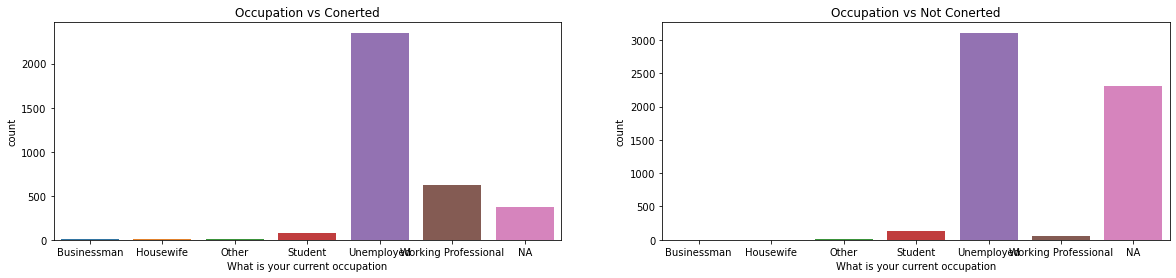

In [45]:
## Univariate for categorical Occupation
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Occupation vs Conerted")
sns.countplot(target_converted["What is your current occupation"])

plt.subplot(1,2,2)
plt.title("Occupation vs Not Conerted")
sns.countplot(target_not_converted["What is your current occupation"])

**Observations**: 

1. Working Professional COnvertion rate is high
2. convertional rate is less for of occupation  details not available
3. unemployed and Student converion is bit unpredictable

In [46]:
ls_mapper = {}
i = 1
for col in leads["Lead Source"].value_counts().index.to_list():
    ls_mapper[col] = i
    i = i+1
print(ls_mapper)

{'Google': 1, 'Direct Traffic': 2, 'Olark Chat': 3, 'Organic Search': 4, 'Reference': 5, 'Welingak Website': 6, 'Referral Sites': 7, 'Other': 8, 'NA': 9}


<AxesSubplot:title={'center':'Lead Source vs Not Converted'}, xlabel='Lead Source', ylabel='count'>

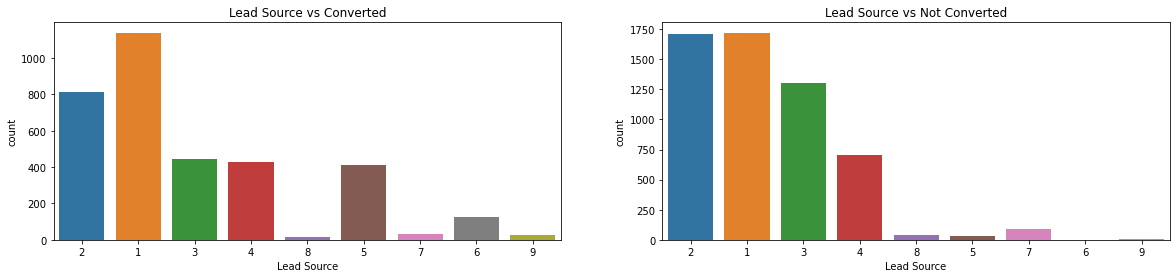

In [47]:
## Univariate for categorical 
lead_source_converted = target_converted['Lead Source'].map(ls_mapper)
lead_source_not_converted = target_not_converted['Lead Source'].map(ls_mapper)
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Lead Source vs Converted")
sns.countplot(lead_source_converted)
plt.subplot(1,2,2)
plt.title("Lead Source vs Not Converted")
sns.countplot(lead_source_not_converted)

**Observations**

1. Reference and Welingak Website conversion rate is high
2. Google 50% conversion rate
3. Other 'Sources' converting chances are lesser


<AxesSubplot:title={'center':'City vs Not Converted'}, xlabel='City', ylabel='count'>

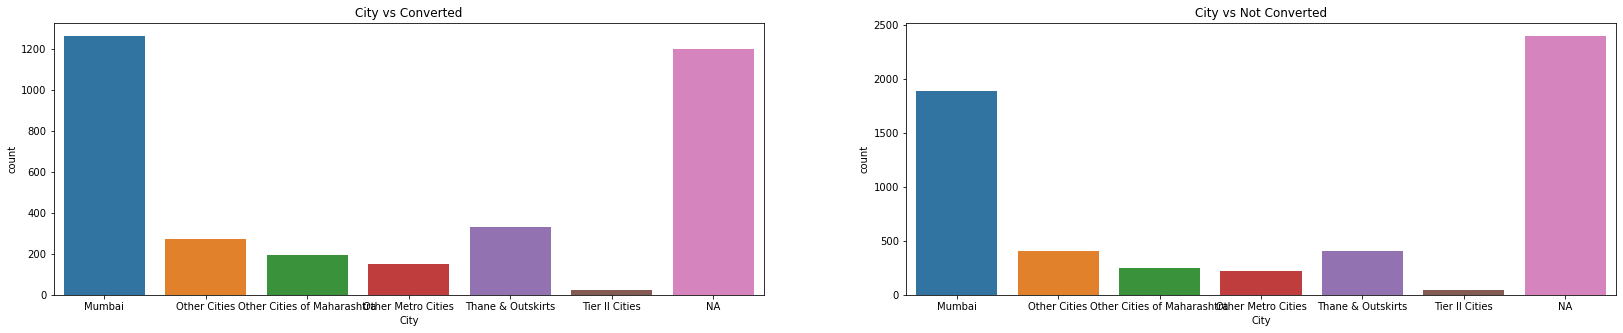

In [48]:
plt.figure(figsize = (28,5))
plt.subplot(1,2,1)
plt.title("City vs Converted")
sns.countplot(target_converted["City"])

plt.subplot(1,2,2)
plt.title("City vs Not Converted")
sns.countplot(target_not_converted["City"])

**Observation**

1. Mumbai, Thane & outskirts conversion rate is higher

In [49]:
ls_mapper = {}
i = 1
for col in leads["Specialization"].value_counts().index.to_list():
    ls_mapper[col] = i
    i = i+1
print(ls_mapper)

{'NA': 1, 'Finance Management': 2, 'Human Resource Management': 3, 'Marketing Management': 4, 'Operations Management': 5, 'Business Administration': 6, 'IT Projects Management': 7, 'Supply Chain Management': 8, 'Banking, Investment And Insurance': 9, 'Travel and Tourism': 10, 'Media and Advertising': 11, 'International Business': 12, 'Healthcare Management': 13, 'E-COMMERCE': 14, 'Hospitality Management': 15, 'Retail Management': 16, 'Rural and Agribusiness': 17, 'E-Business': 18, 'Services Excellence': 19}


<AxesSubplot:title={'center':'Specialization vs Not Converted'}, xlabel='Specialization', ylabel='count'>

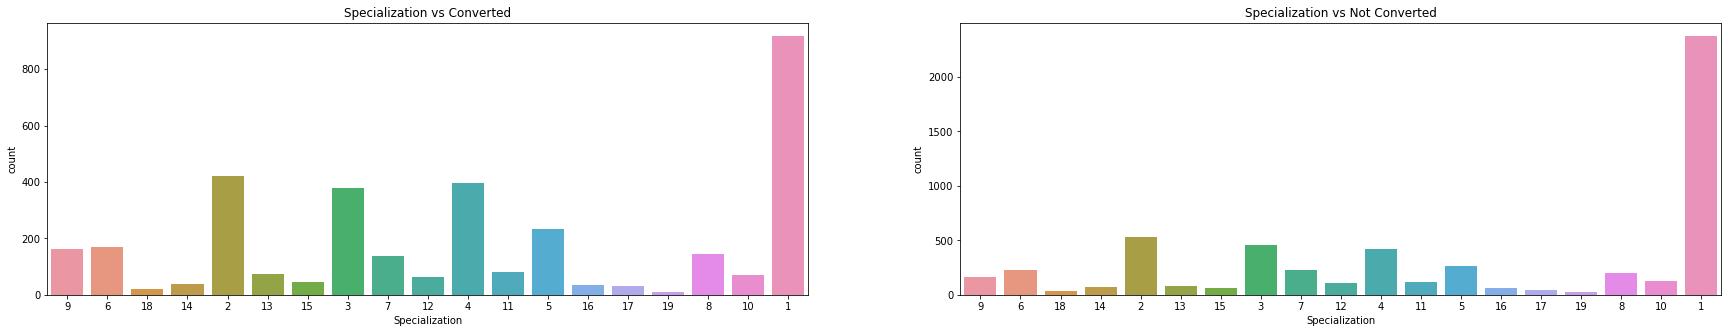

In [50]:
specialization_converted = target_converted['Specialization'].map(ls_mapper)
specialization_not_converted = target_not_converted['Specialization'].map(ls_mapper)
plt.figure(figsize = (30,5))
plt.subplot(1,2,1)
plt.title("Specialization vs Converted")
sns.countplot(specialization_converted)

plt.subplot(1,2,2)
plt.title("Specialization vs Not Converted")
sns.countplot(specialization_not_converted)

**Observation**: If the leads has specializtion chances of convertion is bit higher

In [51]:
target_not_converted.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<AxesSubplot:title={'center':'What matters most to you in choosing a course vs Not Converted'}, xlabel='What matters most to you in choosing a course', ylabel='count'>

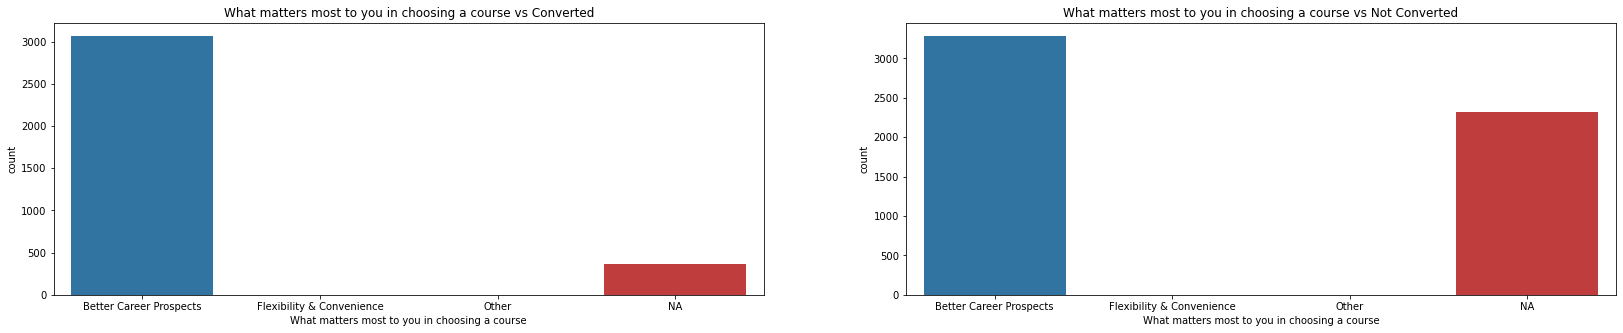

In [52]:

plt.figure(figsize = (28,5))
plt.subplot(1,2,1)
plt.title("What matters most to you in choosing a course vs Converted")
sns.countplot(target_converted["What matters most to you in choosing a course"])

plt.subplot(1,2,2)
plt.title("What matters most to you in choosing a course vs Not Converted")
sns.countplot(target_not_converted["What matters most to you in choosing a course"])

**Observations**

In information not available less likey to get converted

### **<font color="#F08080">5.4 Bivariant analysis on Categorical-Categorical Data with respective to Target</font>**

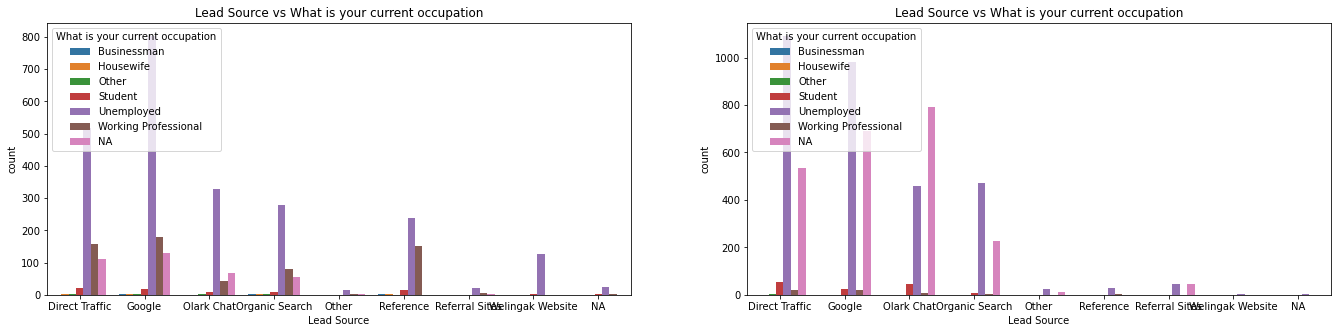

In [53]:
## Bivariant for categorical AMT_INCOME_TOTAL_BINS and AMT_CREDIT_BINS
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("Lead Source vs What is your current occupation")
f1 = sns.countplot(target_converted["Lead Source"], hue=target_converted["What is your current occupation"])

plt.subplot(1,2,2)
plt.title("Lead Source vs What is your current occupation")
f2 = sns.countplot(target_not_converted["Lead Source"], hue=target_not_converted["What is your current occupation"])


**Observations** <br>
Working Professional leads are hot leads<br>
Welingak Website leads are hot leads

### **<font color="#F08080">5.5 Finding Hidden Correlation among Continuous Data</font>**

In [54]:
target_converted_corr_df = target_converted.corr().round(decimals=2)
target_not_converted_corr_df = target_not_converted.corr().round(decimals=2)

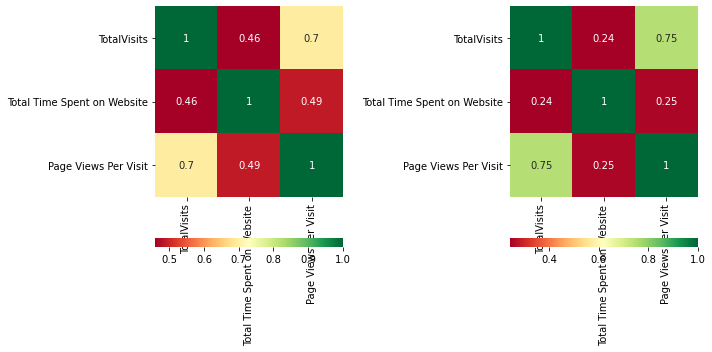

In [55]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(target_converted_corr_df,  annot=True, cmap="RdYlGn", cbar_kws={"orientation": "horizontal"})
plt.subplot(1,2,2)
sns.heatmap(target_not_converted_corr_df,  annot=True, cmap="RdYlGn", cbar_kws={"orientation": "horizontal"})
plt.tight_layout()
plt.show()

**Observations** : TotalVisits and Per Page Views Per Visit ha high correlation 

### **<font color="#F08080">5.6 Observations</font>**

### **<font color="#F08080">5.7 Univariant Analysis on Continuous Data with respective to Target</font>**

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

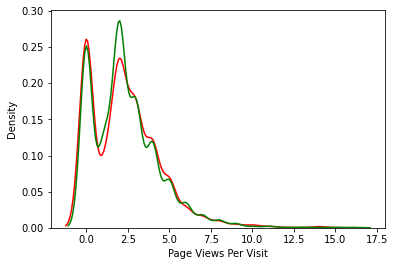

In [56]:
## Univariate for continuous

sns.distplot(target_converted["Page Views Per Visit"], hist = False, label = 'Target 1', color="red")
sns.distplot(target_not_converted["Page Views Per Visit"], hist = False, label = 'Target 0', color="green")

<AxesSubplot:xlabel='Total Time Spent on Website', ylabel='Density'>

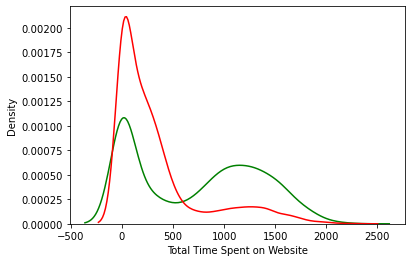

In [57]:
## Univariate for continuous

sns.distplot(target_converted["Total Time Spent on Website"], hist = False, label = 'Converted', color="Green")
sns.distplot(target_not_converted["Total Time Spent on Website"], hist = False, label = 'Not Converted', color="Red")

<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

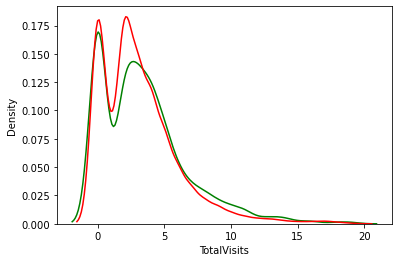

In [58]:
## Univariate for continuous

sns.distplot(target_converted["TotalVisits"], hist = False, label = 'Converted', color="Green")
sns.distplot(target_not_converted["TotalVisits"], hist = False, label = 'Not Converted', color="Red")

### **<font color="#F08080"> 5.8 Bivariant Analysis on Continuous - Continuous Data with respective to Target</font>**

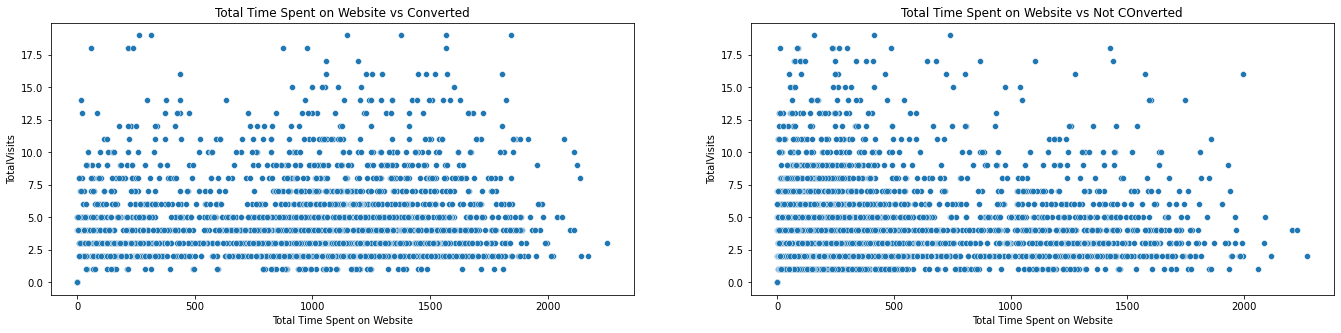

In [59]:
# Bivariant for categorical AMT_INCOME_TOTAL and AMT_CREDIT
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("Total Time Spent on Website vs Converted")

sns.scatterplot(target_converted['Total Time Spent on Website'], y=target_converted['TotalVisits'])
plt.subplot(1,2,2)
plt.title("Total Time Spent on Website vs Not COnverted")
sns.scatterplot(target_not_converted['Total Time Spent on Website'], y=target_not_converted['TotalVisits'])
plt.show()

**Observation** : No pattern observed

### **<font color="#F08080"> 5.9 Bivariant Analysis on Categorical and Continuous Data with respective to Targe</font>**

<AxesSubplot:title={'center':'Lead Source Vs TotalVisits'}, xlabel='Lead Source', ylabel='TotalVisits'>

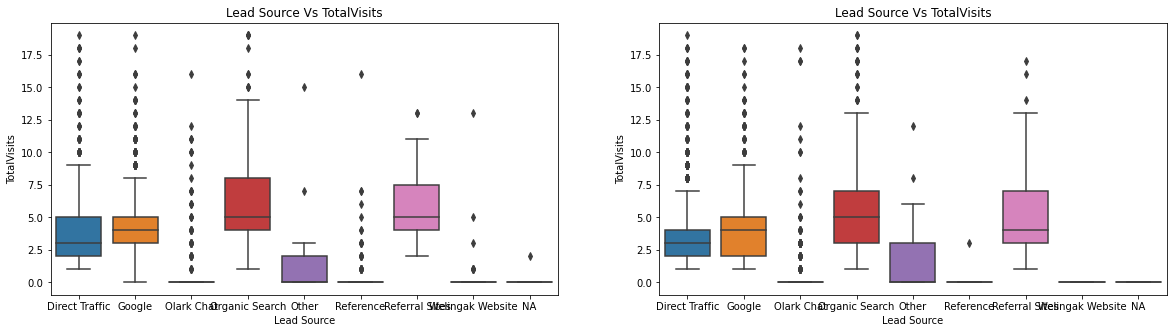

In [60]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Lead Source Vs TotalVisits")
sns.boxplot(x = 'Lead Source', y = 'TotalVisits', data = target_converted)

plt.subplot(1,2,2)
plt.title("Lead Source Vs TotalVisits")
sns.boxplot(x  = 'Lead Source', y = 'TotalVisits', data = target_not_converted)

## **<font color="sky blue">6. Data Preprocessing</font>**

In [61]:
# Sales team generated data
sales_team_generated_data = {"Last Activity", "Last Notable Activity", "Lead Profile", "Tags", "Lead Quality", "Asymmetrique Activity Inde",
                             "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"}

In [62]:
# Removing Sales team generated data.
leads = leads[set(leads.columns)-sales_team_generated_data]

### **<font color="#F08080"> 6.1 Dummies Creation</font>**

In [63]:
# Categorical data variable 
categorical_variables = [col for col in leads.columns if leads[col].dtype.name == 'category']
continuous_variables = set(set(leads.columns) - set(categorical_variables))

In [64]:
#Predictors
categorical_variables = set(categorical_variables) - {"Converted"}

In [65]:
#To create Dummies using pandas
#Create n dummies. To avoid redundancy in dummies droping first dummy 
categorical_data = pd.get_dummies(leads[categorical_variables], drop_first=True)

In [66]:
categorical_data.shape

(9044, 47)

In [67]:
#To add Dummies to original data
leads = pd.concat([leads, categorical_data], axis=1 )
leads.head()

,City,Lead Source,Lead Origin,Specialization,Converted,A free copy of Mastering The Interview,Do Not Email,What is your current occupation,Page Views Per Visit,What matters most to you in choosing a course,TotalVisits,Total Time Spent on Website,Country,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_NA,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_NA,Lead Origin_Landing Page Submission,Lead Origin_Other,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_NA,A free copy of Mastering The Interview_Yes,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_NA,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_NA,Country_Other,Country_NA
0,NA,Olark Chat,API,NA,0,No,No,Unemployed,0.0,Better Career Prospects,0.0,0,NA,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,NA,Organic Search,API,NA,0,No,No,Unemployed,2.5,Better Career Prospects,5.0,674,India,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Mumbai,Direct Traffic,Landing Page Submission,Business Administration,1,Yes,No,Student,2.0,Better Career Prospects,2.0,1532,India,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,Mumbai,Direct Traffic,Landing Page Submission,Media and Advertising,0,No,No,Unemployed,1.0,Better Career Prospects,1.0,305,India,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Mumbai,Google,Landing Page Submission,NA,1,No,No,Unemployed,1.0,Better Career Prospects,2.0,1428,India,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [68]:
#dropping original variables since dummies representing categorical data
leads.drop(categorical_variables, axis=1, inplace=True)

In [69]:
leads.head()

,Converted,Page Views Per Visit,TotalVisits,Total Time Spent on Website,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_NA,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_NA,Lead Origin_Landing Page Submission,Lead Origin_Other,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_NA,A free copy of Mastering The Interview_Yes,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_NA,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_NA,Country_Other,Country_NA
0,0,0.0,0.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,2.5,5.0,674,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2.0,2.0,1532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,1.0,305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1.0,2.0,1428,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


### **<font color="#F08080">6.2 Train Test Split</font>**

In [70]:
# tarin test Split 
# Train size 70%
leads_train, leads_test = train_test_split(leads, train_size=0.7, random_state=100)

### **<font color="#F08080">6.3 Scaling</font>**

In [71]:
#scalling : using normalize scaling to bring data into (0,1) range
# Train Data  finding parameters and trasforming data
scaler = MinMaxScaler()
leads_train[list(continuous_variables)] = scaler.fit_transform(leads_train[continuous_variables])

#transforming data on train scalar
leads_test[list(continuous_variables)] = scaler.transform(leads_test[continuous_variables])

In [72]:
leads_train.describe()

,Page Views Per Visit,TotalVisits,Total Time Spent on Website,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_NA,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_NA,Lead Origin_Landing Page Submission,Lead Origin_Other,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_NA,A free copy of Mastering The Interview_Yes,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_NA,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_NA,Country_Other,Country_NA
count,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.000000,6330.0,6330.0,6330.000000,6330.000000,6330.000000
mean,0.147763,0.172836,0.212895,0.073776,0.051027,0.040916,0.081675,0.008057,0.395735,0.319115,0.190995,0.129858,0.005529,0.050553,0.012480,0.013586,0.003160,0.534913,0.071090,0.046919,0.006003,0.012164,0.103318,0.018167,0.010585,0.089889,0.040284,0.019905,0.091627,0.021643,0.054976,0.010269,0.008847,0.003949,0.039968,0.021327,0.365087,0.317062,0.076619,0.001106,0.001896,0.021169,0.602686,0.072196,0.299842,0.0,0.0,0.301264,0.031754,0.255766
std,0.130987,0.163508,0.241364,0.261426,0.220070,0.198112,0.273890,0.089405,0.489047,0.466171,0.393116,0.336173,0.074159,0.219100,0.111025,0.115774,0.056126,0.498819,0.256995,0.211483,0.077253,0.109628,0.304397,0.133567,0.102343,0.286046,0.196641,0.139686,0.288522,0.145526,0.227952,0.100820,0.093648,0.062725,0.195900,0.144483,0.481493,0.465368,0.266007,0.033238,0.043502,0.143959,0.489381,0.258832,0.458225,0.0,0.0,0.458843,0.175357,0.436325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.062500,0.052632,0.003995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,0.125000,0.157895,0.107856,0.000000,0.000000,0.000000,0.000000,0.000

In [73]:
# Creating Train and Test Target and separating target from train test  predictors
Y_train = leads_train.pop("Converted")
X_train = leads_train
Y_test = leads_test.pop("Converted")
X_test = leads_test

## **<font color="sky blue">7. Feature Seletion</font>**


### **<font color="#F08080">7.1 RFE</font>**

In [74]:
#feature selection
# using RFE To find to 15 best features

lm = LogisticRegression(class_weight='balanced', solver="saga")
lm.fit(X_train, Y_train)
rfe = RFE(lm,20)
rfe.fit(X_train, Y_train)

RFE(estimator=LogisticRegression(class_weight='balanced', solver='saga'),
    n_features_to_select=20)

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Page Views Per Visit', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('City_Other Cities', False, 27),
 ('City_Other Cities of Maharashtra', False, 28),
 ('City_Other Metro Cities', False, 13),
 ('City_Thane & Outskirts', False, 19),
 ('City_Tier II Cities', False, 10),
 ('City_NA', False, 2),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Other', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_NA', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Other', True, 1),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 3),
 ('Specialization_Finance Management', False, 25),
 ('Specialization_Healthcare Management', False, 24),
 ('Specialization_Hospitality Man

In [76]:
columns = X_train.columns[rfe.support_]
columns.to_list()

['Page Views Per Visit',
 'TotalVisits',
 'Total Time Spent on Website',
 'Lead Source_Other',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Lead Source_NA',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Other',
 'Specialization_Hospitality Management',
 'Specialization_NA',
 'Do Not Email_Yes',
 'What is your current occupation_Housewife',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'What is your current occupation_NA',
 'What matters most to you in choosing a course_NA',
 'Country_NA']

In [77]:
X_train_rfe = X_train[columns] # rfe has retuned top 20 features. so considering top 15 features for model building

### **<font color="#F08080">7.2 Manual Feature Selection</font>**

In [78]:
# to create constants
X_train_rfe = sm.add_constant(X_train_rfe, has_constant='add')

In [79]:
lm = sm.Logit(Y_train, X_train_rfe).fit(method="cg")

         Current function value: 0.441440
         Iterations: 35
         Function evaluations: 99
         Gradient evaluations: 99


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
print(lm.summary())

                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6330
Model:                          Logit   Df Residuals:                     6309
Method:                           MLE   Df Model:                           20
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                  0.3354
Time:                        19:52:07   Log-Likelihood:                -2794.3
converged:                      False   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5094      1.093     -0.466      0.641      -2.652       1.633
Page 

In [81]:
# To display VIF score of each independent variable
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif["Features"] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Features,VIF
0,Page Views Per Visit,5.640964
1,TotalVisits,4.782162
2,Total Time Spent on Website,2.377206
3,Lead Source_Other,2.405761
4,Lead Source_Reference,30.669452
5,Lead Source_Welingak Website,9.014818
6,Lead Source_NA,2.686743
7,Lead Origin_Landing Page Submission,7.174496
8,Lead Origin_Other,42.421643
9,Specialization_Hospitality Management,1.019328


In [82]:
# Dropping Lead Source_Reference as it has highest p value > 0.05 and highest
X_train_rfe.drop(["Lead Source_Reference"], axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.Logit(Y_train, X_train_rfe).fit(method="cg")
print(lm.summary())

         Current function value: 0.441445
         Iterations: 35
         Function evaluations: 101
         Gradient evaluations: 101
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6330
Model:                          Logit   Df Residuals:                     6310
Method:                           MLE   Df Model:                           19
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                  0.3354
Time:                        19:52:07   Log-Likelihood:                -2794.3
converged:                      False   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
#Dropping What is your current occupation_NA as it has highest p value > 0.05 and highest
X_train_rfe.drop(["What is your current occupation_NA"], axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.Logit(Y_train, X_train_rfe).fit(method="cg")
print(lm.summary())

         Current function value: 0.441283
         Iterations: 35
         Function evaluations: 103
         Gradient evaluations: 103
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6330
Model:                          Logit   Df Residuals:                     6311
Method:                           MLE   Df Model:                           18
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                  0.3357
Time:                        19:52:07   Log-Likelihood:                -2793.3
converged:                      False   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
#Dropping What is your current occupation_Other as it has highest p value > 0.05 and highest
X_train_rfe.drop(["What is your current occupation_Other"], axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.Logit(Y_train, X_train_rfe).fit(method="cg")
print(lm.summary())

         Current function value: 0.441790
         Iterations: 35
         Function evaluations: 101
         Gradient evaluations: 101


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6330
Model:                          Logit   Df Residuals:                     6312
Method:                           MLE   Df Model:                           17
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                  0.3349
Time:                        19:52:07   Log-Likelihood:                -2796.5
converged:                      False   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7239      0.570     -1.270      0.204      -1.841       0.393
Page 

In [85]:
#Dropping What is your current occupation_Housewife p value > 0.05 and highest
X_train_rfe.drop(["What is your current occupation_Housewife"], axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.Logit(Y_train, X_train_rfe).fit(method="cg")
print(lm.summary())

         Current function value: 0.441761
         Iterations: 35
         Function evaluations: 99
         Gradient evaluations: 99
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6330
Model:                          Logit   Df Residuals:                     6313
Method:                           MLE   Df Model:                           16
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                  0.3350
Time:                        19:52:07   Log-Likelihood:                -2796.3
converged:                      False   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [86]:
#Dropping What is your current occupation_Unemployed p value > 0.05 and highest
X_train_rfe.drop(["What is your current occupation_Unemployed"], axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.Logit(Y_train, X_train_rfe).fit(method="cg")
print(lm.summary())

         Current function value: 0.441745
         Iterations: 35
         Function evaluations: 106
         Gradient evaluations: 106
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6330
Model:                          Logit   Df Residuals:                     6314
Method:                           MLE   Df Model:                           15
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                  0.3350
Time:                        19:52:07   Log-Likelihood:                -2796.2
converged:                      False   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
#Dropping What is your current occupation_Student p value > 0.05 and highest
X_train_rfe.drop(["What is your current occupation_Student"], axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.Logit(Y_train, X_train_rfe).fit(method="cg")
print(lm.summary())

         Current function value: 0.441655
         Iterations: 35
         Function evaluations: 111
         Gradient evaluations: 111
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6330
Model:                          Logit   Df Residuals:                     6315
Method:                           MLE   Df Model:                           14
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                  0.3351
Time:                        19:52:07   Log-Likelihood:                -2795.7
converged:                      False   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
#Dropping Lead Source_NA p value > 0.05 and highest
X_train_rfe.drop(["Lead Source_NA"], axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.Logit(Y_train, X_train_rfe).fit(method="cg")
print(lm.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.442233
         Iterations: 35
         Function evaluations: 105
         Gradient evaluations: 105
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6330
Model:                          Logit   Df Residuals:                     6316
Method:                           MLE   Df Model:                           13
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                  0.3343
Time:                        19:52:07   Log-Likelihood:                -2799.3
converged:                      False   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------

In [89]:
# To display VIF score of each independent variable
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif["Features"] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Features,VIF
0,Page Views Per Visit,5.398029
1,TotalVisits,4.563490
2,Total Time Spent on Website,2.123967
3,Lead Source_Other,1.048127
4,Lead Source_Welingak Website,1.295475
5,Lead Origin_Landing Page Submission,3.414356
6,Lead Origin_Other,1.865978
7,Specialization_Hospitality Management,1.017716
8,Specialization_NA,2.670136
9,Do Not Email_Yes,1.101851


In [90]:
#Dropping Lead Source_NA p value > 0.05 and highest
X_train_rfe.drop(["Page Views Per Visit"], axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.Logit(Y_train, X_train_rfe).fit(method="cg")
print(lm.summary())

         Current function value: 0.442592
         Iterations: 35
         Function evaluations: 108
         Gradient evaluations: 108
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6330
Model:                          Logit   Df Residuals:                     6317
Method:                           MLE   Df Model:                           12
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                  0.3337
Time:                        19:52:07   Log-Likelihood:                -2801.6
converged:                      False   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [91]:
# To display VIF score of each independent variable
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif["Features"] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Features,VIF
0,TotalVisits,2.723435
1,Total Time Spent on Website,2.107680
2,Lead Source_Other,1.047926
3,Lead Source_Welingak Website,1.294429
4,Lead Origin_Landing Page Submission,2.934648
5,Lead Origin_Other,1.860712
6,Specialization_Hospitality Management,1.017684
7,Specialization_NA,2.574784
8,Do Not Email_Yes,1.101066
9,What is your current occupation_Working Profes...,1.187890


## **<font color="sky blue">8. Model Traning(Logistic Regression)</font>**

In [92]:
# Model Training
X_train_new = X_train_rfe.drop(['const'], axis=1)
classifier = LogisticRegression(class_weight='balanced', solver="saga")
classifier.fit(X_train_new, Y_train)

LogisticRegression(class_weight='balanced', solver='saga')

## **<font color="sky blue">8. Cutoff Analysis</font>**

In [93]:
# FInding Best Cutt Off value 
preds = classifier.predict_proba(X_train_new)
tpr, tpr, thresholds = roc_curve(Y_train,preds[:,1])
print(thresholds)
sensitivity_scores = []
specificity_scores = []
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(preds[:,1] > thres,1,0)
    # Apply desired utility function to y_preds, for example accuracy.
    sensitivity_scores.append(recall_score(Y_train, y_pred))
    specificity_scores.append(precision_score(Y_train, y_pred))
    accuracy_ls.append(accuracy_score(Y_train, y_pred))
df = pd.DataFrame({"Cutoff":thresholds, "Accuracy":accuracy_ls, "Recall":sensitivity_scores, "Precision":specificity_scores })

[1.99950595 0.99950595 0.99580929 ... 0.0369935  0.03690399 0.00711896]


In [94]:
df

,Cutoff,Accuracy,Recall,Precision
0,1.999506,0.619589,0.000000,0.000000
1,0.999506,0.619589,0.000000,0.000000
2,0.995809,0.623065,0.009136,1.000000
3,0.995213,0.623223,0.009551,1.000000
4,0.993545,0.638705,0.050664,0.991870
5,0.993515,0.638863,0.051080,0.991935
6,0.990557,0.642812,0.061462,0.993289
7,0.990533,0.642970,0.061877,0.993333
8,0.988864,0.644076,0.065199,0.987421
9,0.988762,0.644234,0.065615,0.987500


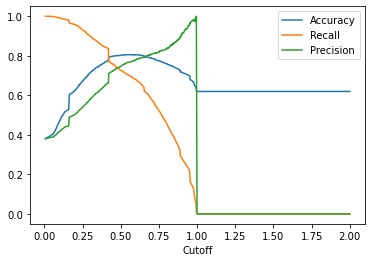

In [95]:
df.plot.line(x="Cutoff", y=["Accuracy", "Recall", "Precision"])
plt.show()

In [96]:
# Class Assignment
Y_train_predict = pd.DataFrame({"Actual":Y_train, "Predicted": preds[:, 1] })
Y_train_predict["Predicted"] = Y_train_predict['Predicted'].map(lambda x: 0 if x < 0.430049 else 1)
Y_train_predict.head()

,Actual,Predicted
8171,1,1
8339,1,1
7097,0,0
7934,0,0
5700,1,1


In [97]:
def draw_roc(actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

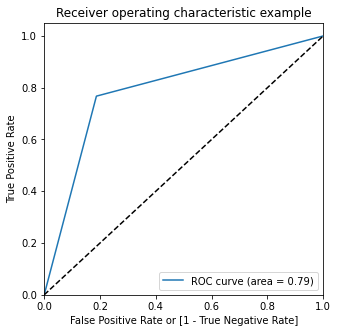

In [98]:
draw_roc(Y_train_predict["Actual"], Y_train_predict["Predicted"])

## **<font color="sky blue">10. Model Evaluation on test data set</font>**

In [99]:
# Model Predictors
X_train_new.columns.to_list()

['TotalVisits',
 'Total Time Spent on Website',
 'Lead Source_Other',
 'Lead Source_Welingak Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Other',
 'Specialization_Hospitality Management',
 'Specialization_NA',
 'Do Not Email_Yes',
 'What is your current occupation_Working Professional',
 'What matters most to you in choosing a course_NA',
 'Country_NA']

In [100]:
# Model verification on test data
Y_test_predict = classifier.predict_proba(X_test[X_train_new.columns.to_list()])

In [101]:
Y_test_predict = pd.DataFrame(Y_test_predict)
Y_test_predict.head()

,0,1
0,0.004787,0.995213
1,0.836903,0.163097
2,0.694880,0.305120
3,0.613008,0.386992
4,0.184546,0.815454


In [102]:
# Assigning Lead Score
Y_test_predict["Lead Score"] = Y_test_predict[1] * 100

In [103]:
Y_test_predict["Lead Score"].head()

0    99.521259
1    16.309690
2    30.512044
3    38.699205
4    81.545377
Name: Lead Score, dtype: float64

In [104]:
# Class Assignment
Y_test_predict["Predicted"] = Y_test_predict[1].map(lambda x: 0 if x < 0.430049 else 1)

In [105]:
Y_test = Y_test.reset_index()

In [106]:
Y_test_predict["Actual"] = Y_test["Converted"] 

In [107]:
#COnfusion Matrix of test results
confusion_matrix(Y_test_predict["Actual"], Y_test_predict["Predicted"])

array([[1369,  316],
       [ 248,  781]], dtype=int64)

True positive is 1487.
True negative is 736.
False positive is 190.
False negative is 359.

In [108]:
# Model Performace metrics
print(classification_report(Y_test_predict["Actual"], Y_test_predict["Predicted"]))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1685
           1       0.71      0.76      0.73      1029

    accuracy                           0.79      2714
   macro avg       0.78      0.79      0.78      2714
weighted avg       0.80      0.79      0.79      2714



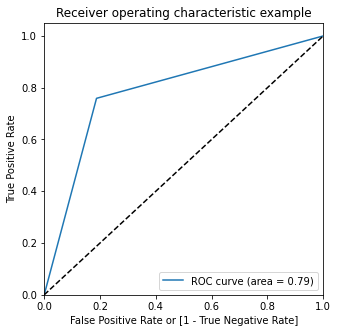

In [109]:
#ROC CURVE
draw_roc(Y_test_predict["Actual"], Y_test_predict["Predicted"])

## **<font color="sky blue">11. Assigned Lead Scores</font>**

In [110]:
Y_test["Lead Score"] = Y_test_predict["Lead Score"]

In [111]:
Y_test.head(10)

,index,Converted,Lead Score
0,2672,1,99.521259
1,6654,0,16.309690
2,4542,0,30.512044
3,3037,0,38.699205
4,3921,1,81.545377
5,8477,0,31.888283
6,2170,0,9.624860
7,4432,1,87.464415
8,7467,1,98.334982
9,5005,0,42.905064


In [112]:
(Y_test["Converted"].value_counts() /len(Y_test)) * 100

0    62.085483
1    37.914517
Name: Converted, dtype: float64

## **<font color="sky blue">11. Conclusion</font>**

Concentrate on working professionals<br>
Reference and Welingak Website conversion rate is high<br>
Google 50% conversion rate<br>
Mumbai, Thane & outskirts conversion rate is higher<br>
the leads which has specialization chances of conversion is bit higher<br>

Model Achieved testing and training sensitivity score 79 and added lead scores to  test leads
